In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import datetime
from bs4 import BeautifulSoup
import pandas_datareader as dr
import statistics

In [2]:
#Get's the Stock Sticker the user wants
user_stock = input("Pick a Dividend Paying Stock's Ticker Symbol: ")
user_stock = user_stock.upper()

Pick a Dividend Paying Stock's Ticker Symbol: mmm


In [3]:
#Gets the string format for Dates
def Dates(date):
    dateString = ''
    for val in str(date):
        if(val == ' '):
            break
        elif(val == '-'):
            dateString = dateString + '/'   
        else:
            dateString = dateString + val
            
    return dateString

In [4]:
#Makes an array that has the desired data for all important items we want to graph
def locator(locator_array,data_array):
    desired_array = []
    desired_array2 = []
    desired_array3 = []
    
# Gets the locations of the data we want in the financial tablet   
    for location in locator_array:
        for value in range(0,5,1):
            desired_array.append(data_array[location+value])
            
# Converts the data that is negative into a readable negative strings            
    for value in desired_array:
        if(value.startswith('(') == True):
            value = value[1:-1]
            value = '-'+ value
        else:
            pass
        desired_array2.append(value)
        
# Converts the into useable numerical values        
    for item in desired_array2:
        if(str(item[-1]) == 'B'):
            item = float(item[0:-1]) * 1000000000
        elif(str(item[-1]) == 'M'):
            item = float(item[0:-1]) * 1000000
        elif(str(item[-1]) == 'T'):
            item = float(item[0:-1]) * 1000000000000
        elif(str(item) == '-'):
            item = np.NaN
        else:
            temp = ''
            for char in item:
                item = item.split(',')
                for i in item:
                    temp += i
                item = float(temp)
        desired_array3.append(item)
            
    return desired_array3

In [5]:
#converts strings into floats
def locator(data_array):
    desired_array2 = []
    desired_array3 = []
            
# Converts the data that is negative into a readable negative strings            
    for value in data_array:
        if(value.startswith('(') == True):
            value = value[1:-1]
            value = '-'+ value
        else:
            pass
        desired_array2.append(value)
        
# Converts the into useable numerical values        
    for item in desired_array2:
        if(str(item[-1]) == 'B'):
            item = float(item[0:-1]) * 1000000000
        elif(str(item[-1]) == 'M'):
            item = float(item[0:-1]) * 1000000
        elif(str(item[-1]) == 'T'):
            item = float(item[0:-1]) * 1000000000000
        elif(str(item) == '-'):
            item = np.NaN
        else:
            temp = ''
            for char in item:
                item = item.split(',')
                for i in item:
                    temp += i
                item = float(temp)
        desired_array3.append(item)
            
    return desired_array3

In [6]:
#This Function is for the 3 valuation ratios
def ValuationRatios(soup):
    finder = []
    holder = []
    holder2 = []
    holder3 = []
    
    for value in soup.find_all('td',style = 'text-align:center;'):
        finder.append(value.text)
      
    #Gets the PE Ratios
    for index in range(7,len(finder),4):
        holder.append(float(finder[index]))
        
    #Gets the date of the PE Ratios  
    for index in range(4,len(finder),4):
        holder2.append(str(finder[index]))
        
    for index in range(6,len(finder),4):
        i = finder[index][1:]
        holder3.append(float(i))
        
        
        
    #Gets the dataframe for the PEs
    PEdataframe = pd.DataFrame({'Dates': holder2,
                               'PEs':holder,
                               'EPS':holder3})
        
    return PEdataframe

In [7]:
#Gets the soup for the link provided
def SoupGetter(searchVar):
    source = requests.get(searchVar).text
    soup = BeautifulSoup(source,'lxml')
    return soup

In [8]:
# This function will give us the point that's closest to the sample mean to estimate with
def BoxplotMeanDot(data):
    closestMean =  abs(statistics.mean(PEs) - data[0])
    for num in range(0,len(data),1):
        if(abs(statistics.mean(data) - data[num]) < closestMean):
            closestMean = abs(statistics.mean(data) - data[num])
            PEC = data[num]
        else:
            pass
        
    return float(PEC)

In [9]:
#Gets stock price over a certain of time the user wants

#Gets today's date
today_time = datetime.datetime.now()
today_date = Dates(pd.to_datetime(today_time,yearfirst = True))
print(today_time)
print(today_date)

#Gets the date One Year ago
oneYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 1 * 365))

#Gets the date Three Years ago
threeYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 3 * 365))

#Gets the date Five Years ago
fivYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 5 * 365))
        
#Gets the date Ten Years ago
tenYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 10 * 365))

#Gets the date 20 Years ago
twentyYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 20 * 365))

#Stock Prices for 1 Year
oneYr_stock_prices = dr.get_data_yahoo('{}'.format(user_stock), start = oneYr_date, end = today_date)

#Stock Prices for 3 Years
threeYr_stock_prices = dr.get_data_yahoo('{}'.format(user_stock), start = threeYr_date, end = today_date)

#Stock Prices for 5 Years
fivYr_stock_prices = dr.get_data_yahoo('{}'.format(user_stock), start = fivYr_date, end = today_date)

#Stock Prices for 10 Years
tenYr_stock_prices = dr.get_data_yahoo('{}'.format(user_stock), start = tenYr_date, end = today_date)

#Stock Prices for 10 Years
twentyYr_stock_prices = dr.get_data_yahoo('{}'.format(user_stock), start = twentyYr_date, end = today_date)


#Gets Today's date in string format for dividend webscrape in epoch time
epochToday = str(int(datetime.datetime(int(today_date[0:4]),int(today_date[5:7]),int(today_date[8:10]),0,0).timestamp()))

2021-05-02 16:23:04.824895
2021/05/02


In [10]:
#Gets the years for the graphs
year = int(datetime.datetime.now().year) - 1
years = [year,year-1,year-2,year-3,year-4]
years = [str(i) for i in years]
print(years)
years = np.flip(years)
print(years)

['2020', '2019', '2018', '2017', '2016']
['2016' '2017' '2018' '2019' '2020']


In [11]:
#Gets the dividend data from Yahoo finance from today's date to 20 Years ago 

divSoup = SoupGetter('https://finance.yahoo.com/quote/{0}/history?period1=946684800&period2={1}&interval=div%7Csplit&filter=div&frequency=1d'.format(user_stock,epochToday))

#This for loop acquires the dividend by the quarter
dividends = []
for i in divSoup.find_all('td',class_ = 'Ta(c) Py(10px) Pstart(10px)'):
    div = i.text
    div = div.split(' ')
    divCount = 0
    for val in div:
        if(divCount == 0):
            dividends.append(float(val))
            divCount += 1
        else:
            divCount -= 1
            
#This for loop gets the years together
dividendDates = []
for date in divSoup.find_all('td',class_ = 'Py(10px) Ta(start) Pend(10px)'):
    dividendDates.append(date.text[8:12])
    
#ideal Dataframes for dividends
dividendDataframe = pd.DataFrame({'Dates':np.flip(dividendDates),
                                 'Dividends':np.flip(dividends)})

dividendDataFrame = pd.DataFrame({'Years':pd.unique(dividendDataframe['Dates']),
                                  'Dividends':dividendDataframe.groupby('Dates')['Dividends'].sum()})

dividendDataFrame = dividendDataFrame[:-1]

print(dividendDataFrame)        

#Calculates dividend perecent change for graphs
dividendPercent = [100*i for i in dividendDataFrame['Dividends'].pct_change()]

      Years  Dividends
Dates                 
2000   2000       1.16
2001   2001       1.20
2002   2002       1.24
2003   2003       1.32
2004   2004       1.44
2005   2005       1.68
2006   2006       1.84
2007   2007       1.92
2008   2008       2.00
2009   2009       2.04
2010   2010       2.10
2011   2011       2.20
2012   2012       2.36
2013   2013       2.54
2014   2014       3.42
2015   2015       4.10
2016   2016       4.44
2017   2017       4.70
2018   2018       5.44
2019   2019       5.76
2020   2020       5.88


In [12]:
#Webscrapes for the name of stock
name_soup = SoupGetter(searchVar = 'https://www.cnbc.com/quotes/{0}?qsearchterm={0}'.format(user_stock))

#Gets the company name we need to webscrape
CompanyName = name_soup.find(class_ = 'QuoteStrip-quoteTitle').text.lower()
splitName = CompanyName.split(' ')

print(CompanyName)

try:
    compName = splitName[0]
    
except:
    compName = CompanyName.replace(' ','-')
    
print(compName)
#Webscrapes for pe ratios
PBs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-book'.format(user_stock,compName)))

BookValue = np.flip(PBs['EPS'])
neoBookDates = np.flip(PBs['Dates'])

neoPBs = pd.DataFrame({'Dates':neoBookDates,
                      'BookValues':BookValue})

neoPBs.reset_index(inplace = True)

#Webscrapes for ps ratios
PSs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-sales'.format(user_stock,compName)))

#Webscrapes the PEs in the data
PEs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/pe-ratio'.format(user_stock,compName)))

neoEPS = np.flip(PEs['EPS'])
neoDates = np.flip(PEs['Dates'])

neoPEs = pd.DataFrame({'Dates':neoDates,
                      'EPS':neoEPS})

neoPEs.reset_index(inplace = True)

print(neoPBs)

3m co mmm:nyse
3m
    index       Dates  BookValues
0      60  2006-03-31       14.58
1      59  2006-06-30       15.30
2      58  2006-09-30       14.92
3      57  2006-12-31       13.56
4      56  2007-03-31       13.96
5      55  2007-06-30       14.35
6      54  2007-09-30       15.38
7      53  2007-12-31       16.56
8      52  2008-03-31       17.66
9      51  2008-06-30       17.93
10     50  2008-09-30       17.61
11     49  2008-12-31       14.86
12     48  2009-03-31       14.60
13     47  2009-06-30       16.07
14     46  2009-09-30       18.25
15     45  2009-12-31       18.72
16     44  2010-03-31       19.42
17     43  2010-06-30       20.07
18     42  2010-09-30       22.15
19     41  2010-12-31       22.50
20     40  2011-03-31       23.77
21     39  2011-06-30       25.01
22     38  2011-09-30       24.84
23     37  2011-12-31       22.82
24     36  2012-03-31       23.95
25     35  2012-06-30       24.41
26     34  2012-09-30       26.22
27     33  2012-12-31       26

In [13]:
#This is the dataframe of the prices from the lowest EPS' date to the most recent
PEdates = dr.get_data_yahoo('{}'.format(user_stock), start = PEs['Dates'][len(PEs) - 1], end = PEs['Dates'][0])
PEdates.reset_index(inplace = True)

#Converts all datetimes into workable strings
strDates = []
for i in PEdates['Date']:
    i = str(i)
    i = i[:10]
    strDates.append(i)
    
#Sets the Date column to strDates
PEdates['Date'] = strDates

#Gets all of the dates that range the EPS dataset
idx = pd.date_range(PEs['Dates'][len(PEs) - 1],PEs['Dates'][0])
strIdx = []
for i in idx:
    i = str(i)
    i = i[:10]
    strIdx.append(i)

#Use for loops to fill in a whole new datadrame that has the EPS column & turns into DataFrame
Finaldates = []
FinalEPS = []

i = 0
for date in range(0,len(strIdx),1):
    if(strIdx[date] == neoPEs['Dates'][i]):
        
        Finaldates.append(strIdx[date])
        FinalEPS.append(neoPEs['EPS'][i])
        i = i + 1
    else:
        Finaldates.append(strIdx[date])
        FinalEPS.append(neoPEs['EPS'][i])

FinalPEdf = pd.DataFrame({'Dates': Finaldates,
                        'EPS': FinalEPS})

##Now we need to get the prices of the stock

#These are the indices where we have EPS for the PEdates data
x = list(PEdates['Date'])
neoEPS = []
for value in range(0,len(FinalPEdf),1):
    if(FinalPEdf['Dates'][value] in x):
        neoEPS.append(FinalPEdf['EPS'][value])
    else:
        pass
             
PEdates['EPS'] = neoEPS
PEdates['PE'] = PEdates['Close'] / PEdates['EPS']
PEdates['PE'] = round(PEdates['PE'],2)

In [14]:
#Webscrapes quarterly and annual EPS of a stock
EPS_soup = SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/eps-earnings-per-share-diluted'.format(user_stock,compName))

EPSfinder = []
EPSdates = []
EPSdollar = []

#Gets the EPS data from macrotrends.com
for value in EPS_soup.find_all('td',style = 'text-align:center'):
    EPSfinder.append(value.text)

#Gets the money by the quarter
for val in range(0,len(EPSfinder),1):
    if(('-' in EPSfinder[val]) and ('$' not in EPSfinder[val])):
        try:
            EPSdollar.append(float(EPSfinder[val+1][1:]))
        except:
            pass
    else: pass
        
#Gets the dates by the quarter 
for date in range(0,len(EPSfinder),1):
    if(('-' in EPSfinder[date]) and (' ' not in EPSfinder[date]) and ('$' not in EPSfinder[date])):
        EPSdates.append(EPSfinder[date])
    else: pass
    
#Gets the Years by themselves
EPSyears = [i[0:4] for i in EPSdates]    

#Yearly EPS dataframe 
yearlyEPS = pd.DataFrame({'EPS':np.flip(EPSdollar),
                          'Date':np.flip(EPSyears)})

yearlyEPS = pd.DataFrame({'EPS':yearlyEPS.groupby('Date')['EPS'].sum(),
                         'Date':pd.unique(yearlyEPS['Date'])})

yearlyEPS = yearlyEPS[:-1]

#Quarterly EPS dataframe
EPSquarts = pd.to_datetime(EPSdates)

quarterlyEPS = pd.DataFrame({'EPS':np.flip(EPSdollar),
                            'Dates':np.flip(EPSquarts),
                            'num':[number for number in range(0,len(EPSdollar),1)]})


# Gets the percentage change for Yearly 
epsPercentYearly = [100*i for i in yearlyEPS['EPS'].pct_change()]
epsPercentQuarterly = [100*i for i in quarterlyEPS['EPS'].pct_change()]

print(epsPercentYearly)

[nan, 27.13567839195983, 10.671936758893263, -12.678571428571416, -7.566462167689181, 24.55752212389384, 5.861456483126082, 6.0402684563758635, 6.329113924050644, 11.458333333333325, 1.2016021361815676, 7.651715039577844, -2.818627450980382, 12.105926860025228, -12.148481439820024, 18.437900128040962]


In [15]:
#Gets Essential Balance Sheet data 
BalanceSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/balance-sheet'.format(user_stock))

index = 0

#Puts all BalanceSheet data in a array
BalanceData = []
for i in BalanceSoup.find_all('div',class_ = 'cell__content'):
    BalanceData.append(str(i.text))


try:
    
    #List of desired lines of a balance sheet 
    desiredBalance = ['Total Current Assets','Total Assets','Total Current Liabilities','Total Liabilities']
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
            
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years':years,
                                      'Total_Current_Assets':locator(list(SortedBalanceSheet[0:5])),
                                     'Total_Assets':locator(list(SortedBalanceSheet[5:10])),
                                     'Total_Current_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                      'Total_Liabilities':locator(list(SortedBalanceSheet[15:20]))
                                         })
    
#The except is for financials or REITS
except:
    
    #For loop to work through balance sheet data
    desiredBalance = ['Total Assets','Total Liabilities']
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
        
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years':years,
                                     'Total_Current_Assets': [np.nan,np.nan,np.nan,np.nan,np.nan],
                                     'Total_Assets':locator(list(SortedBalanceSheet[0:5])),
                                    'Total_Current_Liabilities': [np.nan,np.nan,np.nan,np.nan,np.nan],
                                      'Total_Liabilities':locator(list(SortedBalanceSheet[5:10]))
                                     })
    
print(BalanceSheetDataFrame)

  Years  Total_Current_Assets  Total_Assets  Total_Current_Liabilities  \
0  2016          1.173000e+10  3.291000e+10               6.220000e+09   
1  2017          1.428000e+10  3.799000e+10               7.690000e+09   
2  2018          1.371000e+10  3.650000e+10               7.240000e+09   
3  2019          1.297000e+10  4.466000e+10               9.220000e+09   
4  2020          1.498000e+10  4.734000e+10               7.950000e+09   

   Total_Liabilities  
0       2.256000e+10  
1       2.637000e+10  
2       2.665000e+10  
3       3.453000e+10  
4       3.441000e+10  


In [16]:
IncomeSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/income'.format(user_stock))

#Puts all Income Statement data in a array
IncomeData = []
for i in IncomeSoup.find_all('div',class_ = 'cell__content'):
    IncomeData.append(str(i.text))

#List of desired lines of a Income Statement
desiredIncome = ['Net Income','Sales/Revenue','Gross Income']

#For loop to work through Income Statement data
SortedIncome = []
for item in desiredIncome: 
    for index in range(0,len(IncomeData),1):
        if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
            for number in range(1,6,1):
                SortedIncome.append(IncomeData[index + number])
        else:
            pass        
    
if(len(SortedIncome) < 10):
    for i in range(0,5,1):
        SortedIncome.append('0')
else:
    pass
#Makes Income Statement into a pandas dataframe
IncomeDataFrame = pd.DataFrame({'Years': years,
                                      'Net_Income': locator(list(SortedIncome[0:5])),
                                      'Revenue': locator(list(SortedIncome[5:10])),
                                      'Gross_Income': locator(list(SortedIncome[10:15]))
                                     })
#Creates Operating Margins
IncomeDataFrame['Gross_Operating_Margins'] = (IncomeDataFrame['Gross_Income']/IncomeDataFrame['Revenue']) * 100

print(IncomeDataFrame)

  Years    Net_Income       Revenue  Gross_Income  Gross_Operating_Margins
0  2016  5.050000e+09  3.011000e+10  1.498000e+10                49.750913
1  2017  4.860000e+09  3.166000e+10  1.566000e+10                49.463045
2  2018  5.350000e+09  3.277000e+10  1.619000e+10                49.404944
3  2019  4.570000e+09  3.214000e+10  1.531000e+10                47.635345
4  2020  5.380000e+09  3.218000e+10  1.560000e+10                48.477315


In [17]:
CashSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/cash-flow'.format(user_stock))

#Puts all Income Statement data in a array
CashData = []
for i in CashSoup.find_all('div',class_ = 'cell__content'):
    CashData.append(str(i.text))

#List of desired lines of a Income Statement
desiredCash = ['Net Investing Cash Flow','Cash Dividends Paid - Total','Free Cash Flow']

#For loop to work through Income Statement data
SortedCash = []
for item in desiredCash: 
    for index in range(0,len(CashData),1):
        if((CashData[index - 1] ==  item) and (CashData[index] == item)):
            for number in range(1,6,1):
                SortedCash.append(CashData[index + number])
        else:
            pass        
    
#Makes Income Statement into a pandas dataframe
CashFlowDataFrame = pd.DataFrame({'Years': years,
                                  'Net_Investing_Cashflow': locator(list(SortedCash[0:5])),\
                                  'Dividends': locator(list(SortedCash[5:10])),
                                  'Free_Cash_Flow': locator(list(SortedCash[10:15]))
                                 })

print(CashFlowDataFrame)

  Years  Net_Investing_Cashflow     Dividends  Free_Cash_Flow
0  2016           -1.400000e+09 -2.680000e+09    5.240000e+09
1  2017           -3.090000e+09 -2.800000e+09    4.870000e+09
2  2018            2.220000e+08 -3.190000e+09    4.860000e+09
3  2019           -6.440000e+09 -3.320000e+09    5.370000e+09
4  2020           -5.800000e+08 -3.390000e+09    6.610000e+09


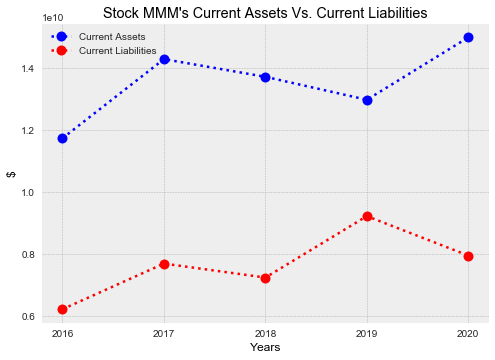

In [57]:
#Balance Sheet Graph for Current Assets vs. Liabilities
plt.style.use('bmh')

plt.plot(years,BalanceSheetDataFrame['Total_Current_Assets'],color = 'b',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Current Assets'
        )

plt.plot(years,BalanceSheetDataFrame['Total_Current_Liabilities'],color = 'r',linewidth = 2.5,marker = '.',
        markersize = 20, linestyle = 'dotted', label = 'Current Liabilities'
        )

plt.xlabel('Years', color = 'k')
plt.ylabel('$', color = 'k')
plt.title("Stock {0}'s Current Assets Vs. Current Liabilities".format(user_stock), color = 'k')
plt.legend(loc = 'best',shadow = True)


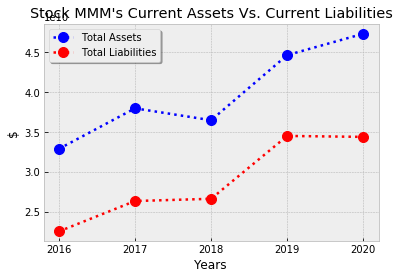

In [19]:
#Balance Sheet Graph for Current Assets vs. Liabilities
plt.style.use('bmh')

plt.plot(years,BalanceSheetDataFrame['Total_Assets'],color = 'b',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Total Assets'
        )

plt.plot(years,BalanceSheetDataFrame['Total_Liabilities'],color = 'r',linewidth = 2.5,marker = '.',
        markersize = 20, linestyle = 'dotted', label = 'Total Liabilities'
        )

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Current Assets Vs. Current Liabilities".format(user_stock))
plt.legend(loc = 'best',shadow = True)

(0, 1.0157247037374657)

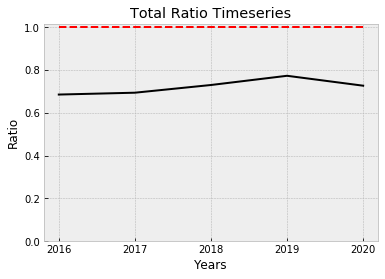

In [20]:
#Acquire TotalRatio & CurrentRatio

BalanceSheetDataFrame['TotalRatio'] = BalanceSheetDataFrame['Total_Liabilities'] / BalanceSheetDataFrame['Total_Assets']
BalanceSheetDataFrame['CurrentRatio'] = BalanceSheetDataFrame['Total_Current_Liabilities'] / BalanceSheetDataFrame['Total_Current_Assets']

#Plots the Total Ratio
plt.plot(years,BalanceSheetDataFrame['TotalRatio'],color = 'k')
plt.hlines(1,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'red')
plt.title('Total Ratio Timeseries')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.ylim([0,None])

(0, 1.023595915390226)

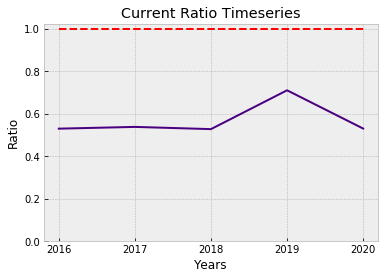

In [21]:
#Plots the Current Ratio
plt.plot(years,BalanceSheetDataFrame['CurrentRatio'],color = 'indigo')
plt.hlines(1,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'red')
plt.title('Current Ratio Timeseries')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.ylim([0,None])

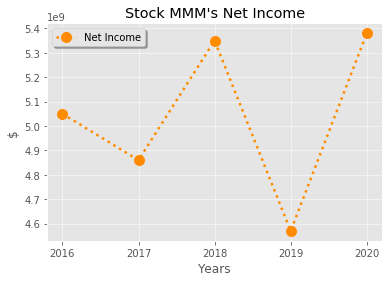

In [22]:
# Income Statement Graph
plt.style.use('ggplot')
plt.plot(years,IncomeDataFrame['Net_Income'],color = 'darkorange',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Net Income'
        )

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Net Income".format(user_stock))
plt.legend(loc = 'best',shadow = True)

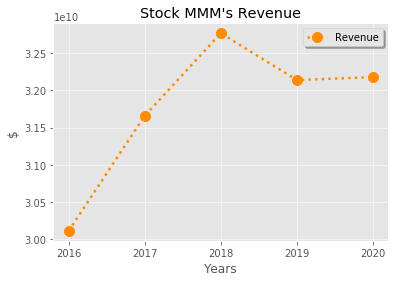

In [23]:
# Income Statement Graph 2
plt.style.use('ggplot')
plt.plot(years,IncomeDataFrame['Revenue'],color = 'darkorange',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Revenue'
        )

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Revenue".format(user_stock))
plt.legend(loc = 'best',shadow = True)

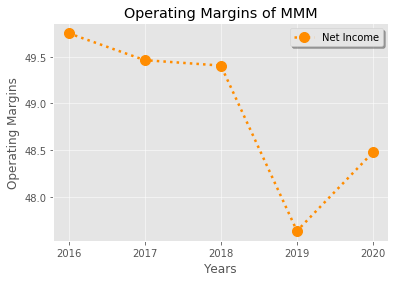

In [24]:
#Opearting Margings over the year
plt.plot(years,IncomeDataFrame['Gross_Operating_Margins'],color = 'darkorange',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Net Income'
        )
plt.title('Operating Margins of {0}'.format(user_stock))
plt.ylabel('Operating Margins')
plt.xlabel('Years')
plt.legend(loc = 'best',shadow = True)

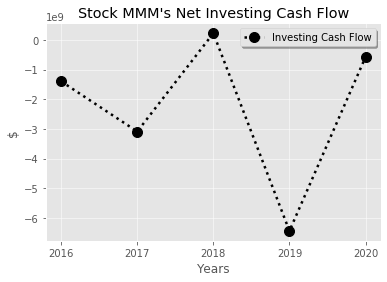

In [25]:
#Cashflow Graph
plt.plot(years,CashFlowDataFrame['Net_Investing_Cashflow'],color = 'black',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Investing Cash Flow'
        )

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Net Investing Cash Flow".format(user_stock))
plt.legend(loc = 'best',shadow = True)

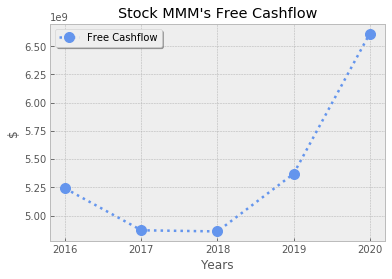

In [26]:
# Shows the Free Cashflow that comes in over time

plt.style.use('bmh')
plt.plot(years,CashFlowDataFrame['Free_Cash_Flow'], color = 'cornflowerblue',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Free Cashflow')
plt.title("Stock {0}'s Free Cashflow".format(user_stock))
plt.xlabel('Years')
plt.ylabel('$')
plt.legend(loc = 'best',shadow = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

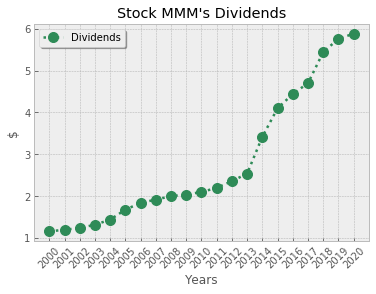

In [27]:
# Shows the amount of Dividends paid over time

plt.style.use('bmh')
plt.plot(dividendDataFrame['Years'],dividendDataFrame['Dividends'], color = 'seagreen',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Dividends')
plt.title("Stock {0}'s Dividends".format(user_stock))
plt.xlabel('Years')
plt.ylabel('$')
plt.legend(loc = 'best',shadow = True)
plt.xticks(rotation=45)

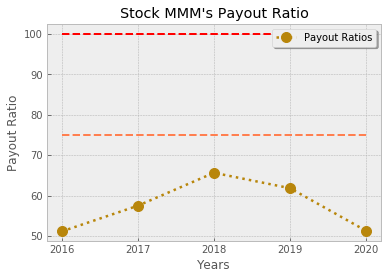

In [28]:
# Shows the payout ratio over time
plt.style.use('bmh')
payoutRatios = (abs(CashFlowDataFrame['Dividends']) / CashFlowDataFrame['Free_Cash_Flow'] ) * 100

plt.plot(years,payoutRatios,color = 'darkgoldenrod',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Payout Ratios')
plt.title("Stock {0}'s Payout Ratio".format(user_stock))
plt.xlabel('Years')
plt.ylabel('Payout Ratio')
plt.legend(loc = 'best',shadow = True)
plt.hlines(100,xmin = years[0] , xmax = years[4],linestyle = 'dashed',color = 'red')
plt.hlines(75,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'coral')

In [29]:
#Wbescrapes General Information
gen_soup = SoupGetter(searchVar = 'https://finance.yahoo.com/quote/{0}?p={0}'.format(user_stock))    

genData = []
for i in gen_soup.find_all('td',class_ = 'Ta(end) Fw(600) Lh(14px)'):
    genData.append(i.text)
    
for i in gen_soup.find_all('h1',class_ = 'D(ib) Fz(18px)'):
    print(i.text)

#Makes all values in one year range into a float
oneYrPrices = [float(i) for i in oneYr_stock_prices['Close']]

print('Market Cap: ' + genData[8])
print('Beta: ' + genData[9])
print('PE Ratio: ' + genData[10])
print('EPS: ' + genData[11])
print('52 Week Range: $', np.amin(oneYrPrices),'- $',np.amax(oneYrPrices)) 



3M Company (MMM)
Market Cap: 114.277B
Beta: 0.96
PE Ratio: 20.17
EPS: 9.77
52 Week Range: $ 135.99000549316406 - $ 202.1999969482422


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

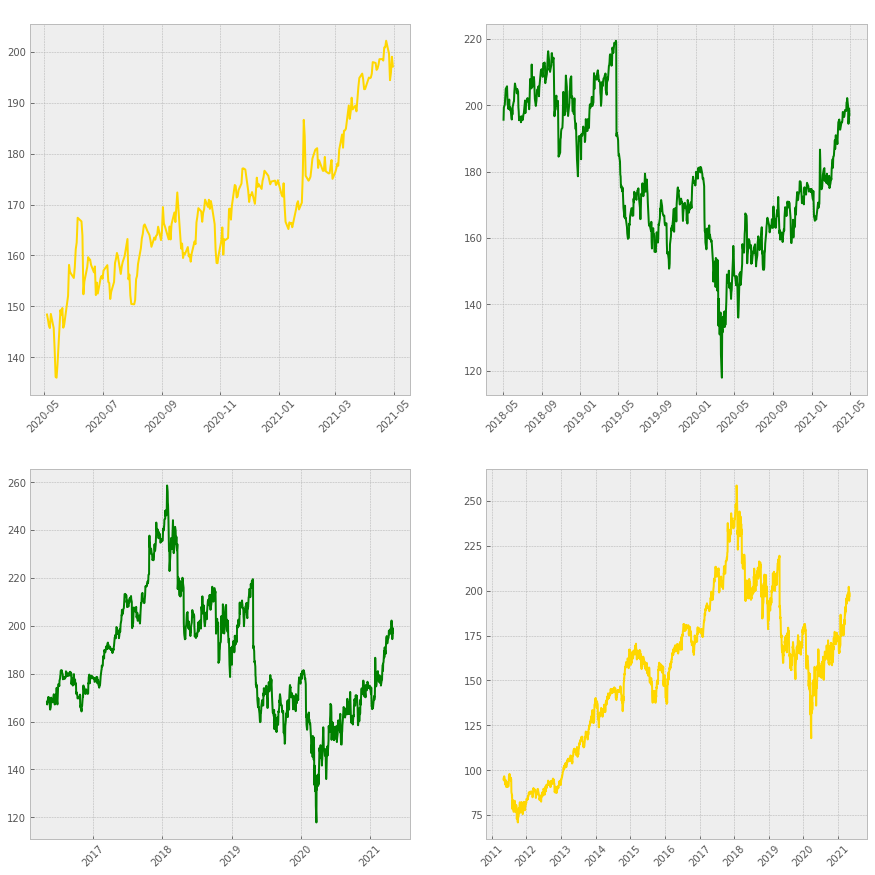

In [30]:
#Stock Prices through history
fig,ax5 = plt.subplots(nrows = 2,ncols = 2,figsize = (15,15))
plt.style.use('dark_background')

#Makes the stock price plot over 1 year
ax5[0,0].plot(oneYr_stock_prices.index.values,
              oneYr_stock_prices['Close'],
              color = 'gold')
ax5[0,0].set_title("{0}'s 1 Year Stock Price".format(user_stock),color = 'white')

plt.setp(ax5[0,0].get_xticklabels(), rotation=45)

#Makes the stock price plot over 3 years
ax5[0,1].plot(threeYr_stock_prices.index.values,
              threeYr_stock_prices['Close'],
              color = 'green')
ax5[0,1].set_title("{0}'s 3 Year Stock Price".format(user_stock),color = 'white')

plt.setp(ax5[0,1].get_xticklabels(), rotation=45)

#Makes the stock price plot over 5 years
ax5[1,0].plot(fivYr_stock_prices.index.values,
              fivYr_stock_prices['Close'],
              color = 'green')
ax5[1,0].set_title("{0}'s 5 Year Stock Price".format(user_stock),color = 'white')

plt.setp(ax5[1,0].get_xticklabels(), rotation=45)

#Makes the stock price plot over 10 years
ax5[1,1].plot(tenYr_stock_prices.index.values,
              tenYr_stock_prices['Close'],
              color = 'gold')
ax5[1,1].set_title("{0}'s 10 Year Stock Price".format(user_stock),color = 'white')

plt.setp(ax5[1,1].get_xticklabels(), rotation=45)

In [31]:
#General Dividend Information

dividendData = genData[13].split(' ')

#Checks if there is a dividend or not
if(dividendData[0][0:-1] == 'N/'):
    dividend = 0
else:
    dividend = float(dividendData[0][0:-1])
    
try:
    payoutRatio = dividend/float(genData[11])
except:
    payoutRatio = 'N/A'


try:
    if(len(dividendPercent) >= 5):
        FivDiv = statistics.mean(dividendPercent[-6:-1])
    else:
        FivDiv = statistics.mean(dividendPercent)
        
except:
    FivDiv = 0
    
try:
    if(len(dividendPercent) >= 10):
        TenDiv = statistics.mean(dividendPercent[-11:-1])
    else:
        TenDiv = statistics.mean(dividendPercent)
        
except:
    TenDiv = 0

print('Payout Ratio', payoutRatio)
print('Dividend(Annual): $',dividend)
print('Dividend Yield',dividendData[1][1:-1])
print('3 Year Dividend Growth Rate: ',(sum(dividendPercent[-3:])/3),'%')
print('5 Year Dividend Growth Rate: ',(sum(dividendPercent[-5:])/5),'%')
print('10 Year Dividend Growth Rate: ',(sum(dividendPercent[-10:])/10),'%')

Payout Ratio 0.6038894575230297
Dividend(Annual): $ 5.9
Dividend Yield 3.00%
3 Year Dividend Growth Rate:  7.903455708524539 %
5 Year Dividend Growth Rate:  7.571781181651751 %
10 Year Dividend Growth Rate:  11.204936681396967 %


Text(0.5, 1.0, "MMM's Dividend % Change Year Over Year (5 Yrs)")

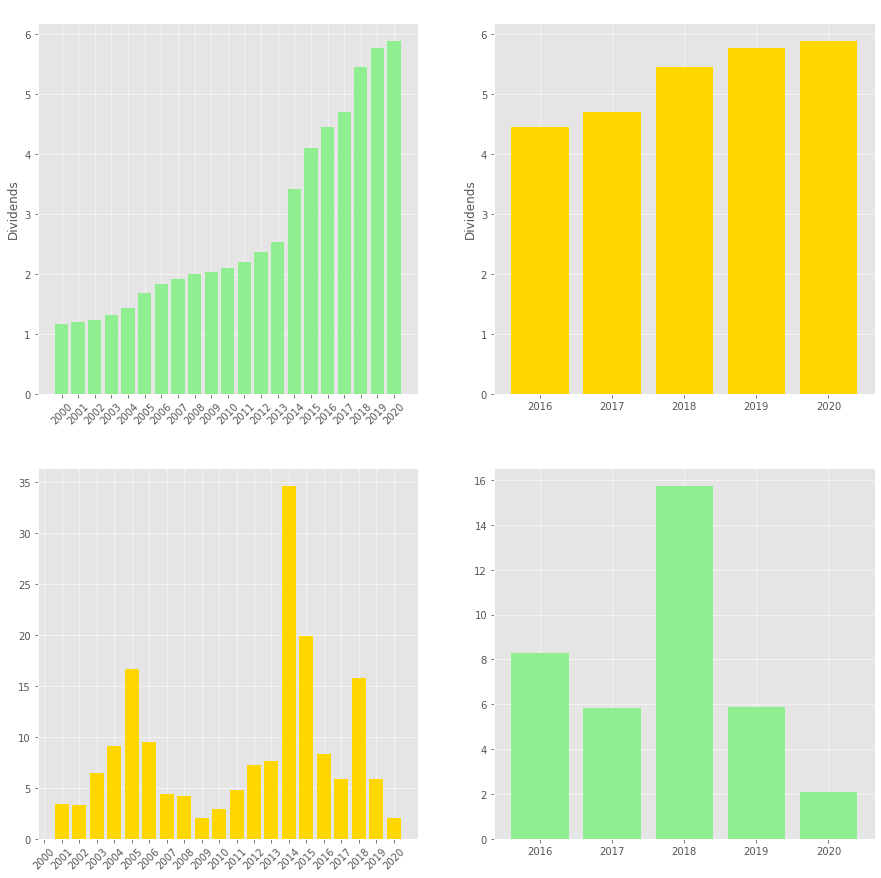

In [32]:
# Dividend Graphs
plt.style.use('ggplot')
fig,ax4 = plt.subplots(nrows = 2,ncols = 2,figsize = (15,15))

#Outputs lifetime Dividends
ax4[0,0].bar(dividendDataFrame['Years'],dividendDataFrame['Dividends'],color = 'lightgreen')
ax4[0,0].set_title("{0}'s Life Time Dividend Payout (20 Yrs)".format(user_stock))
ax4[0,0].set_ylabel('Dividends')
plt.setp(ax4[0,0].get_xticklabels(), rotation=45)

#Makes the last 5 year raw dividend graphs
ax4[0,1].bar(dividendDataFrame['Years'][-5:],dividendDataFrame['Dividends'][-5:],color = 'gold')
ax4[0,1].set_title("{0}'s 5 yr Dividend Payout (5 Yrs)".format(user_stock))
ax4[0,1].set_ylabel('Dividends')

#Get the percent for the lifetime years for dividends
ax4[1,0].bar(dividendDataFrame['Years'],dividendPercent,color = 'gold')
ax4[1,0].set_title("{0}'s Dividend % Change Year Over Year(20 Yrs)".format(user_stock))
plt.setp(ax4[1,0].get_xticklabels(), rotation=45)

#Get the percent for 5 years for dividends
ax4[1,1].bar(dividendDataFrame['Years'][-5:],dividendPercent[-5:],color = 'lightgreen')
ax4[1,1].set_title("{0}'s Dividend % Change Year Over Year (5 Yrs)".format(user_stock))



PE Ratio 5 Number Summary: 
count    3586.000000
mean       18.627552
std         4.600590
min         9.840000
25%        14.960000
50%        18.125000
75%        21.250000
max        38.370000
Name: PE, dtype: float64
The Current PE Ratio:  20.17
The Mean PE Ratio:  18.62755158951478


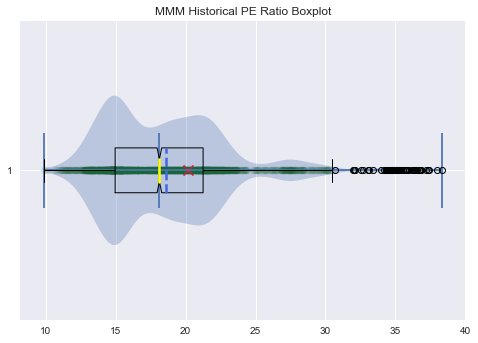

In [33]:
#Creates a sequence of 1s for dots on the boxplots
plt.style.use('seaborn')

PESeq = [1 for i in range(0,len(PEdates['PE']),1)]
#PSSeq = [1 for i in range(0,len(PSs),1)]

#Plots for Valuation Ratios
plt.style.use('seaborn')

##BoxPlots for PE ratios

#PE Boxplot
plt.boxplot(PEdates['PE'], notch = True,vert = False,showmeans = True,meanline = True,
                 meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
plt.scatter(PEdates['PE'],PESeq,color = 'darkgreen',alpha = .05)
plt.scatter(float(genData[10]),1,color = 'r',marker = 'x',s = 100)

plt.title('{0} Historical PE Ratio Boxplot'.format(user_stock))

#PE Violinplot
plt.violinplot(PEdates['PE'],vert = False, showmedians = True)

print('PE Ratio 5 Number Summary: ') 
print(pd.Series(PEdates['PE']).describe())
print("The Current PE Ratio: ",float(genData[10]))
print("The Mean PE Ratio: ",statistics.mean(PEdates['PE']))

PE Ratio 5 Number Summary: 
count    61.000000
mean      5.513443
std       2.856590
min       2.230000
25%       2.960000
50%       4.150000
75%       7.740000
max      11.430000
Name: PEs, dtype: float64


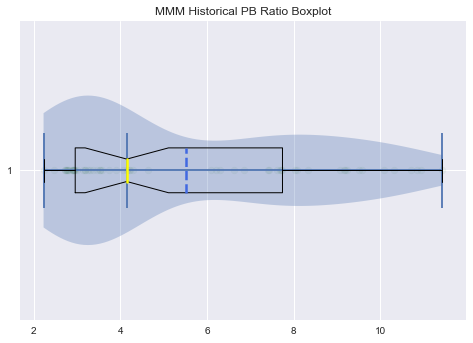

In [34]:
#PBs PEs column is actually the PB ratio from market watch

PBSeq = [1 for i in range(0,len(PBs['PEs']),1)]

##BoxPlots for PB ratios

#PE Boxplot
plt.boxplot(PBs['PEs'], notch = True,vert = False,showmeans = True,meanline = True,
                 meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
plt.scatter(PBs['PEs'],PBSeq,color = 'darkgreen',alpha = .05)

plt.title('{0} Historical PB Ratio Boxplot'.format(user_stock))

#PE Violinplot
plt.violinplot(PBs['PEs'],vert = False, showmedians = True)

print('PE Ratio 5 Number Summary: ') 
print(pd.Series(PBs['PEs']).describe())

Text(0.5, 1.0, 'Yearly EPS Growth of MMM')

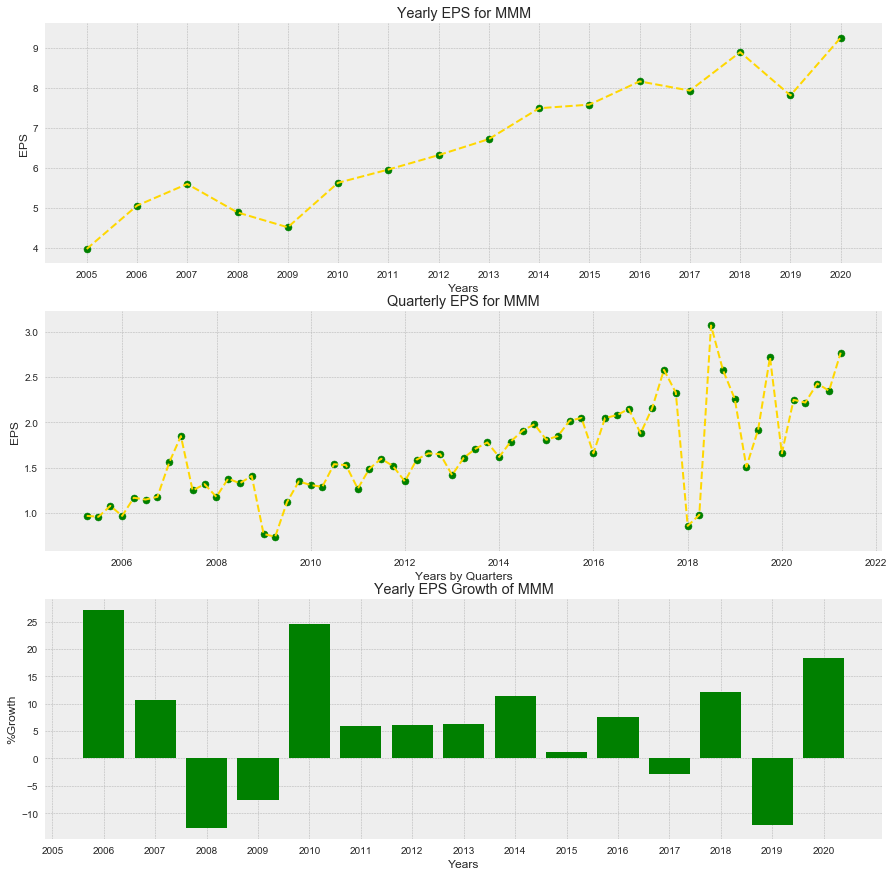

In [35]:
#Plots for Quarterly and Yearly EPS 
plt.style.use('bmh')
fig,(ax7,ax8,ax9) = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))

#Plots the Yearly EPS 
ax7.plot(yearlyEPS['Date'],yearlyEPS['EPS'],color = 'gold',linestyle = 'dashed')
ax7.scatter(yearlyEPS['Date'],yearlyEPS['EPS'],color = 'green')
ax7.set_title('Yearly EPS for {0}'.format(user_stock))
ax7.set_ylabel('EPS')
ax7.set_xlabel('Years')

#Plots the Quarterly EPS
ax8.plot(quarterlyEPS['Dates'],quarterlyEPS['EPS'],color = 'gold',linestyle = 'dashed')
ax8.scatter(quarterlyEPS['Dates'],quarterlyEPS['EPS'],color = 'green')
ax8.set_title('Quarterly EPS for {0}'.format(user_stock))
ax8.set_ylabel('EPS')
ax8.set_xlabel('Years by Quarters')

#Plots Yearly EPS Percent Change

ax9.bar(yearlyEPS['Date'],epsPercentYearly,color = 'g')
ax9.set_xlabel('Years')
ax9.set_ylabel('%Growth')
ax9.set_title('Yearly EPS Growth of {0}'.format(user_stock))
